In [28]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

def Hamiltonian_Graphene(kx,ky,M):
    a = 2.46 
    t = 1
    k = np.array((kx,ky))
    delta1 = (a/2)*np.array((1,np.sqrt(3)))
    delta2 = (a/2)*np.array((1,-np.sqrt(3)))
    delta3 = -a*np.array((1,0))
    hx = np.cos(k@delta1)+np.cos(k@delta2)+np.cos(k@delta3)
    hy = np.sin(k@delta1)+np.sin(k@delta2)+np.sin(k@delta3)
    hz = M
    H = -t*np.matrix([[hz,hx+1j*hy],[hx-1j*hy,-hz]])
    return H

def Input_Curvature(M,m,n,BZx1,BZx2,BZy1,BZy2):

    kx_range = np.linspace(BZx1, BZx2, num=m)
    ky_range = np.linspace(BZy1, BZy2, num=n)

    num_levels = len(Hamiltonian_Graphene(1,1,1))
    energies = np.zeros((m,n,num_levels)); 

    for i in range(m):
        for j in range(n):
            H = Hamiltonian_Graphene(kx_range[i],ky_range[j],M); 
            evals, evecs = LA.eig(H); 
            energies[i,j,:]=evals;
    X, Y = np.meshgrid(kx_range, ky_range)
    Z= energies[:,:,0]
    return(X,Y,Z)
            
            
            
            
            
            
            
def PLOT(X,Y,Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    transparency = 0.3
    ax.plot_wireframe(X, Y, Z, alpha=transparency, antialiased=False, label="c") 
    #ax.axes.set_zlim3d(bottom=-100, top=100) 
    plt.show()
    


def surfature(X,Y,Z,m,n):
     # where X, Y, Z matrices have a shape (lr+1,lb+1)
    lr=m-1
    lb=n-1
    Xv,Xu=np.gradient(X)
    Yv,Yu=np.gradient(Y)
    Zv,Zu=np.gradient(Z)

    Xuv,Xuu=np.gradient(Xu)
    Yuv,Yuu=np.gradient(Yu)
    Zuv,Zuu=np.gradient(Zu)   

    Xvv,Xuv=np.gradient(Xv)
    Yvv,Yuv=np.gradient(Yv)
    Zvv,Zuv=np.gradient(Zv) 

    nrow=(lr+1)*(lb+1)
    Xu=Xu.reshape(nrow,1)
    Yu=Yu.reshape(nrow,1)
    Zu=Zu.reshape(nrow,1)
    Xv=Xv.reshape(nrow,1)
    Yv=Yv.reshape(nrow,1)
    Zv=Zv.reshape(nrow,1)
    Xuu=Xuu.reshape(nrow,1)
    Yuu=Yuu.reshape(nrow,1)
    Zuu=Zuu.reshape(nrow,1)
    Xuv=Xuv.reshape(nrow,1)
    Yuv=Yuv.reshape(nrow,1)
    Zuv=Zuv.reshape(nrow,1)
    Xvv=Xvv.reshape(nrow,1)
    Yvv=Yvv.reshape(nrow,1)
    Zvv=Zvv.reshape(nrow,1)

    Xu=np.c_[Xu, Yu, Zu]
    Xv=np.c_[Xv, Yv, Zv]
    Xuu=np.c_[Xuu, Yuu, Zuu]
    Xuv=np.c_[Xuv, Yuv, Zuv]
    Xvv=np.c_[Xvv, Yvv, Zvv]


    E=np.einsum('ij,ij->i', Xu, Xu) 
    F=np.einsum('ij,ij->i', Xu, Xv) 
    G=np.einsum('ij,ij->i', Xv, Xv) 

    m=np.cross(Xu,Xv,axisa=1, axisb=1)
    p=np.sqrt(np.einsum('ij,ij->i', m, m))
    n=m/np.c_[p,p,p]


    L= np.einsum('ij,ij->i', Xuu, n) 
    M= np.einsum('ij,ij->i', Xuv, n) 
    N= np.einsum('ij,ij->i', Xvv, n) 


    K=(L*N-M**2)/(E*G-F**2)
    K=K.reshape(lr+1,lb+1)


    H = (E*N + G*L - 2*F*M)/(2*(E*G - F**2))
    H = H.reshape(lr+1,lb+1)


    Pmax = H + np.sqrt(H**2 - K)
    Pmin = H - np.sqrt(H**2 - K)
    

    return Pmax,Pmin,H,K

   



<ipython-input-28-f41f889a45c4>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[i,j,:]=evals;


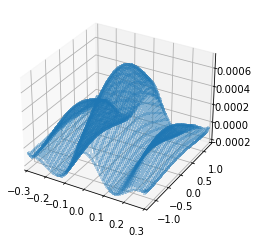

0.0007379239780147442
-0.00022530126120362534


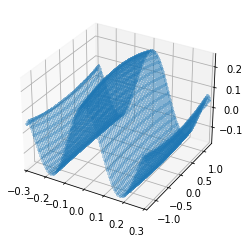

0.25529928696236476
-0.1750982142680356


In [62]:
M=1000
BZx1 = -0.3; BZx2 = 0.3; BZy1 = -1.3; BZy2 = 1.3;
m=100; n=100; 
X,Y,E=Input_Curvature(M,m,n,BZx1,BZx2,BZy1,BZy2)
Pmax,Pmin,H,K=surfature(X,Y,E,m,n)

PLOT(X,Y,K)
print(np.amax(K))
print(np.amin(K))

PLOT(X,Y,H)
print(np.amax(H))
print(np.amin(H))